## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

Let's take a look at the dataframe first.

In [3]:
df

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73
5,99.2,M,83
6,98.0,M,71
7,98.8,M,78
8,98.4,F,84
9,98.6,F,86


## Answers

**Question 1. Is the distribution of body temperatures normal?**

To answer this, first let's plot the data as a frequency histogram.

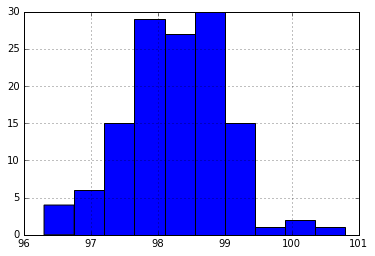

In [4]:
%matplotlib inline
df.temperature.hist()

We notice that the data is approximately normal with a slight amount of skew to the left.
Another way of testing for normality is to use the *mstats.normaltest* function, which tests the null hypothesis that the sample comes from a normal distribution.

In [5]:
sp.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

From the p-value, we cannot reject the null hypothesis that the sample comes from a normal distribution.

**Question 2. Is the true population mean really 98.6 degrees F?**

Hnull -> Our null hypothesis is that the population mean (mu) is 98.6 F.
H1    -> Our hypothesis is that the population mean is not 98.6 F.

If the probability of getting the sample distribution mean is really small, assuming the null hypothesis, then we can reject the null hypothesis. In other words, how likely is it for us to get a sample mean of 98.2, under the assumption that the true population mean is 98.6. If this is less than 0.05, we reject the null hypothesis.

In [6]:
mu = 98.6 # population mean
mu_s = df.temperature.mean() # check sample mean
std_s = df.temperature.std() # Get sample standard deviation

In [7]:
mu_s

98.24923076923078

In [8]:
std_s

0.7331831580389454

Standard deviation of the population (std) is approximately = sample std/sqrt(n)

In [9]:
std = std_s/np.sqrt(len(df))

In [10]:
std

0.06430441683789101

Since the sample size is over 30, we use a z-test instead of a t-test. We compute the z-statistic for the population.

In [11]:
z = (mu - mu_s)/std

In [12]:
z

5.4548232923640789

The probability of getting a sample distribution that is 5.45 standard deviations away is less than 0.02% which is well below the significance threshold of 5%. Hence, the null hypothesis stating that the true population mean is 98.6 degrees F may be safely rejected.

**Question 3. At what temperature should we consider someone's temperature to be "abnormal"?**

To answer this question, we need to come up with an interval in the sampling distribution, where we can say with reasonable confidence that there is a 99% chance for the true mean to fall under. In other words, this is the interval where the probability that the mean of the sampling distribution is within 2 standard deviations away from the sample mean, is 95%.

In [13]:
# We know the standard error from before, which is std
# Margin of error is 2*std from the sample mean.
me = 2 * std


In [14]:
me

0.12860883367578202

In [15]:
# Calculating margin of error
mu_lower = mu_s - me
mu_upper = mu_s + me

In [16]:
mu_lower

98.120621935554993

In [17]:
mu_upper

98.377839602906562

So, if someone's temperature is either below 98.12 or above 98.73, we can say with reasonable confidence that there is a 95% chance of this temperature being abnormal.

**Question 4. Is there a significant difference between males and females in normal temperature?**

Our null hypothesis is that there is no difference between males and females in normal temerature.
Our hypothesis is that there is a difference between males and females in normal temperature.

In [18]:
# Splitting dataframe into two, by gender
dfMale = df[df['gender']=='M']
dfFem = df[df['gender']=='F']

In [19]:
# Running a ttest to check if there is a significant difference in means
sp.ttest_ind(dfMale.temperature, dfFem.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

We notice that the p-value is less than 0.05. Therefore, we reject the hypothesis as the test suggests evidence in favour of the hypothesis that there is a difference between males and females in normal temperatures.